# Imports

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import numpy as np
import albumentations as A
import plotly.graph_objects as go
import imageio
from PIL import Image
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import winsound
import functions

# Functions

# BRATS 2023 DATA

### USEFUL INFO ON DATA

All BraTS mpMRI scans are available as NIfTI files (.nii.gz) and describe
1. native (T1)
2. post-contrast T1-weighted (T1Gd)
3. T2-weighted (T2), and
4. T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes

Task: Tumor Sub-region Segmentation
The sub-regions considered for evaluation are the:
1."enhancing tumor" (ET)
2."tumor core" (TC)
3."whole tumor" (WT) 
The ET is described by areas that show hyper-intensity in T1Gd when compared to T1, but also when compared to “healthy” white matter in T1Gd.\\
The TC describes the bulk of the tumor, which is what is typically resected. The TC entails the ET, as well as the necrotic (NCR) parts of the tumor. The appearance of NCR is typically hypo-intense in T1-Gd when compared to T1. The WT describes the complete extent of the disease, as it entails the TC and the peritumoral edematous/invaded tissue (ED), which is typically depicted by hyper-intense signal in FLAIR.

The submitted methods will be assessed following the configuration of previous BraTS challenges, using the "Dice Similarity Coefficient", and the "Hausdorff distance (95%)" [4-5]. The aggregate rankings from these two metrics will determine the recipients of monetary awards.

Consistent with the BraTS 2021 Challenge, methods will also be assessed using the metrics of "Sensitivity" and "Specificity" to determine potential over- or under-segmentations of the tumor sub-regions by participating methods. These metrics are provided for participant guidance, and will not impact aggregate rankings.

The provided segmentation labels have values of:

    1 for NCR
    2 for ED
    3 for ET
    0 for everything else.


## Download

In [ ]:
syn = synapseclient.Synapse() 
syn.login('Minty_ines','s-}q.^!p"bG4hcH') 
#files = synapseutils.syncFromSynapse(syn, ' syn51514105 ') 

Welcome, Minty_ines!



In [ ]:
syn = synapseclient.login('Minty_ines','s-}q.^!p"bG4hcH')
dl_list_file_entities = syn.get_download_list()

Welcome, Minty_ines!



In [ ]:
dl_list_file_entities

'manifest_1684946314171461800.csv'

## Creating a metadata.csv for training and validation


In [22]:
path_dataset = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS"
path_train = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"
path_valid = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData"
path_test = ""

In [24]:
train_list_path = os.listdir(path_train)
#valid_list_path = os.listdir(path_valid)

In [31]:
os.listdir(r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000')

['BraTS-GLI-00000-000-seg.nii.gz',
 'BraTS-GLI-00000-000-t1c.nii.gz',
 'BraTS-GLI-00000-000-t1n.nii.gz',
 'BraTS-GLI-00000-000-t2f.nii.gz',
 'BraTS-GLI-00000-000-t2w.nii.gz']

In [32]:
os.path.basename(r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000')

'BraTS-GLI-00000-000'

In [29]:
#Path of the folder containing the dataset
path_train = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"

#Returns the list of the folders containing each patient's MRI
train_list_path = os.listdir(path_train)

#Iterates recursively through the folders and creates a list of images of each MRI sequence and assign respectively
seg,t1c,t1n,t2w =[],[],[],[]
for dir in train_list_path:

    curr_seg = os.path.join(dir,os.path.basename(dir)+'-'+r'seg.nii.gz')
    seg.append(curr_seg)
    
    curr_t1c = os.path.join(dir,os.path.basename(dir)+'-'+r't1c.nii.gz')
    t1c.append(curr_t1c)
    
    curr_t1n = os.path.join(dir,os.path.basename(dir)+'-'+r't1n.nii.gz')
    t1n.append(curr_t1n)
    
    curr_t2w = os.path.join(dir,os.path.basename(dir)+'-'+r't2w.nii.gz')
    t2w.append(curr_t2w)

In [30]:
#Creates a dataframe for the metadata.csv
df = pd.DataFrame({'path_folder' : train_list_path,
              'seg' : seg,
              't1c' : t1c,
              't1n' : t1n,
              't2w' : t2w
             })

In [31]:
df[['a','b','id_patient','index']] = df['path_folder'].str.split('-',expand=True)

In [32]:
df.drop(['a', 'b'], axis = 1, inplace = True) 

In [33]:
df

,path_folder,seg,t1c,t1n,t2w,id_patient,index
0,BraTS-GLI-00000-000,BraTS-GLI-00000-000\BraTS-GLI-00000-000-seg.ni...,BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1c.ni...,BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1n.ni...,BraTS-GLI-00000-000\BraTS-GLI-00000-000-t2w.ni...,00000,000
1,BraTS-GLI-00002-000,BraTS-GLI-00002-000\BraTS-GLI-00002-000-seg.ni...,BraTS-GLI-00002-000\BraTS-GLI-00002-000-t1c.ni...,BraTS-GLI-00002-000\BraTS-GLI-00002-000-t1n.ni...,BraTS-GLI-00002-000\BraTS-GLI-00002-000-t2w.ni...,00002,000
2,BraTS-GLI-00003-000,BraTS-GLI-00003-000\BraTS-GLI-00003-000-seg.ni...,BraTS-GLI-00003-000\BraTS-GLI-00003-000-t1c.ni...,BraTS-GLI-00003-000\BraTS-GLI-00003-000-t1n.ni...,BraTS-GLI-00003-000\BraTS-GLI-00003-000-t2w.ni...,00003,000
3,BraTS-GLI-00005-000,BraTS-GLI-00005-000\BraTS-GLI-00005-000-seg.ni...,BraTS-GLI-00005-000\BraTS-GLI-00005-000-t1c.ni...,BraTS-GLI-00005-000\BraTS-GLI-00005-000-t1n.ni...,BraTS-GLI-00005-000\BraTS-GLI-00005-000-t2w.ni...,00005,000
4,BraTS-GLI-00006-000,BraTS-GLI-00006-000\BraTS-GLI-00006-000-seg.ni...,BraTS-GLI-00006-000\BraTS-GLI-00006-000-t1c.ni...,BraTS-GLI-00006-000\BraTS-GLI-00006-000-t1n.ni...,BraTS-GLI-00006-000\BraTS-GLI-00006-000-t2w.ni...,00006,000
...,...,...,...,...,...,...,...
1246,BraTS-GLI-01662-000,BraTS-GLI-01662-000\BraTS-GLI-01662-000-seg.ni...,BraTS-GLI-01662-000\BraTS-GLI-01662-000-t1c.ni...,BraTS-GLI-01662-000\BraTS-GLI-01662-000-t1n.ni...,BraTS-GLI-01662-000\BraTS-GLI-01662-000-t2w.ni...,01662,000
1247,BraTS-GLI-01663-000,BraTS-GLI-01663-000\BraTS-GLI-01663-000-seg.ni...,BraTS-GLI-01663-000\BraTS-GLI-01663-000-t1c.ni...,BraTS-GLI-01663-000\BraTS-GLI-01663-000-t1n.ni...,BraTS-GLI-01663-000\BraTS-GLI-01663-000-t2w.ni...,01663,000
1248,BraTS-GLI-01664-000,BraTS-GLI-01664-000\BraTS-GLI-01664-000-seg.ni...,BraTS-GLI-01664-000\BraTS-GLI-01664-000-t1c.ni...,BraTS-GLI-01664-000\BraTS-GLI-01664-000-t1n.ni...,BraTS-GLI-01664-000\BraTS-GLI-01664-000-t2w.ni...,01664,000
1249,BraTS-GLI-01665-000,BraTS-GLI-01665-000\BraTS-GLI-01665-000-seg.ni...,BraTS-GLI-01665-000\BraTS-GLI-01665-000-t1c.ni...,BraTS-GLI-01665-000\BraTS-GLI-01665-000-t1n.ni...,BraTS-GLI-01665-000\BraTS-GLI-01665-000-t2w.ni...,01665,000


In [39]:
metadata_train_path =r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\metadata_training.csv"

In [40]:
df.to_csv(metadata_train_path,index=False)

In [41]:
t1c,t1n,t2f,t2w =[],[],[],[]
for dir in valid_list_path:
    curr_t1c = os.path.join(dir,os.path.basename(dir)+'-'+r't1c.nii.gz')
    t1c.append(curr_t1c)
    curr_t1n = os.path.join(dir,os.path.basename(dir)+'-'+r't1n.nii.gz')
    t1n.append(curr_t1n)
    curr_t2f = os.path.join(dir,os.path.basename(dir)+'-'+r't2f.nii.gz')
    t2f.append(curr_t2f)
    curr_t2w = os.path.join(dir,os.path.basename(dir)+'-'+r't2w.nii.gz')
    t2w.append(curr_t2w)

In [42]:
df = pd.DataFrame({'path_folder' : valid_list_path,
              't1c' : t1c,
              't1n' : t1n,
              't2f' : t2f,
              't2w' : t2w
             })

In [43]:
df[['a','b','id_patient','index']] = df['path_folder'].str.split('-',expand=True)
df.drop(['a', 'b'], axis = 1, inplace = True) 

In [44]:
df

,path_folder,t1c,t1n,t2f,t2w,id_patient,index
0,BraTS-GLI-00001-000,BraTS-GLI-00001-000\BraTS-GLI-00001-000-t1c.ni...,BraTS-GLI-00001-000\BraTS-GLI-00001-000-t1n.ni...,BraTS-GLI-00001-000\BraTS-GLI-00001-000-t2f.ni...,BraTS-GLI-00001-000\BraTS-GLI-00001-000-t2w.ni...,00001,000
1,BraTS-GLI-00001-001,BraTS-GLI-00001-001\BraTS-GLI-00001-001-t1c.ni...,BraTS-GLI-00001-001\BraTS-GLI-00001-001-t1n.ni...,BraTS-GLI-00001-001\BraTS-GLI-00001-001-t2f.ni...,BraTS-GLI-00001-001\BraTS-GLI-00001-001-t2w.ni...,00001,001
2,BraTS-GLI-00013-000,BraTS-GLI-00013-000\BraTS-GLI-00013-000-t1c.ni...,BraTS-GLI-00013-000\BraTS-GLI-00013-000-t1n.ni...,BraTS-GLI-00013-000\BraTS-GLI-00013-000-t2f.ni...,BraTS-GLI-00013-000\BraTS-GLI-00013-000-t2w.ni...,00013,000
3,BraTS-GLI-00013-001,BraTS-GLI-00013-001\BraTS-GLI-00013-001-t1c.ni...,BraTS-GLI-00013-001\BraTS-GLI-00013-001-t1n.ni...,BraTS-GLI-00013-001\BraTS-GLI-00013-001-t2f.ni...,BraTS-GLI-00013-001\BraTS-GLI-00013-001-t2w.ni...,00013,001
4,BraTS-GLI-00015-000,BraTS-GLI-00015-000\BraTS-GLI-00015-000-t1c.ni...,BraTS-GLI-00015-000\BraTS-GLI-00015-000-t1n.ni...,BraTS-GLI-00015-000\BraTS-GLI-00015-000-t2f.ni...,BraTS-GLI-00015-000\BraTS-GLI-00015-000-t2w.ni...,00015,000
...,...,...,...,...,...,...,...
214,BraTS-GLI-01774-000,BraTS-GLI-01774-000\BraTS-GLI-01774-000-t1c.ni...,BraTS-GLI-01774-000\BraTS-GLI-01774-000-t1n.ni...,BraTS-GLI-01774-000\BraTS-GLI-01774-000-t2f.ni...,BraTS-GLI-01774-000\BraTS-GLI-01774-000-t2w.ni...,01774,000
215,BraTS-GLI-01775-000,BraTS-GLI-01775-000\BraTS-GLI-01775-000-t1c.ni...,BraTS-GLI-01775-000\BraTS-GLI-01775-000-t1n.ni...,BraTS-GLI-01775-000\BraTS-GLI-01775-000-t2f.ni...,BraTS-GLI-01775-000\BraTS-GLI-01775-000-t2w.ni...,01775,000
216,BraTS-GLI-01776-000,BraTS-GLI-01776-000\BraTS-GLI-01776-000-t1c.ni...,BraTS-GLI-01776-000\BraTS-GLI-01776-000-t1n.ni...,BraTS-GLI-01776-000\BraTS-GLI-01776-000-t2f.ni...,BraTS-GLI-01776-000\BraTS-GLI-01776-000-t2w.ni...,01776,000
217,BraTS-GLI-01789-000,BraTS-GLI-01789-000\BraTS-GLI-01789-000-t1c.ni...,BraTS-GLI-01789-000\BraTS-GLI-01789-000-t1n.ni...,BraTS-GLI-01789-000\BraTS-GLI-01789-000-t2f.ni...,BraTS-GLI-01789-000\BraTS-GLI-01789-000-t2w.ni...,01789,000


In [45]:
metadata_valid_path = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\metadata_validation.csv"

In [46]:
df.to_csv(metadata_valid_path, index=False)

## Visualizing the Images (nifti format)

In [34]:
metadata_train_path=r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\metadata_training.csv"
metadata_valid_path=r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\metadata_validation.csv"
parent_dir_train = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'
parent_dir_valid = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData'

In [62]:
#Reading the metadata
dt = pd.read_csv(metadata_train_path) #training metadata
#dv = pd.read_csv(metadata_valid_path) #validation metadata

In [36]:
dt_row = dt.sample(n=1)
print(dt_row)

              path_folder                                                seg   
1009  BraTS-GLI-01307-000  BraTS-GLI-01307-000\BraTS-GLI-01307-000-seg.ni...  \

                                                    t1c   
1009  BraTS-GLI-01307-000\BraTS-GLI-01307-000-t1c.ni...  \

                                                    t1n   
1009  BraTS-GLI-01307-000\BraTS-GLI-01307-000-t1n.ni...  \

                                                    t2f   
1009  BraTS-GLI-01307-000\BraTS-GLI-01307-000-t2f.ni...  \

                                                    t2w  id_patient  index  
1009  BraTS-GLI-01307-000\BraTS-GLI-01307-000-t2w.ni...        1307      0  


In [37]:
dt_row = dt.sample(n=1)
print(dt_row)

             path_folder                                                seg   
264  BraTS-GLI-00329-000  BraTS-GLI-00329-000\BraTS-GLI-00329-000-seg.ni...  \

                                                   t1c   
264  BraTS-GLI-00329-000\BraTS-GLI-00329-000-t1c.ni...  \

                                                   t1n   
264  BraTS-GLI-00329-000\BraTS-GLI-00329-000-t1n.ni...  \

                                                   t2f   
264  BraTS-GLI-00329-000\BraTS-GLI-00329-000-t2f.ni...  \

                                                   t2w  id_patient  index  
264  BraTS-GLI-00329-000\BraTS-GLI-00329-000-t2w.ni...         329      0  


In [60]:
image_paths_abs = get_paths(parent_dir_train,dt_row)
values_mris = df_row2list(dt_row,beg=-2)
scan_type = [path.split('-')[-1].split('.')[0] for path in image_paths_abs]
scan_type.pop(-2)
image_paths_abs.pop(-2)

print(values_mris)
print(scan_type)

['BraTS-GLI-00329-000\\BraTS-GLI-00329-000-seg.nii.gz', 'BraTS-GLI-00329-000\\BraTS-GLI-00329-000-t1c.nii.gz', 'BraTS-GLI-00329-000\\BraTS-GLI-00329-000-t1n.nii.gz', 'BraTS-GLI-00329-000\\BraTS-GLI-00329-000-t2f.nii.gz', 'BraTS-GLI-00329-000\\BraTS-GLI-00329-000-t2w.nii.gz']
[329, 0]
['seg', 't1c', 't1n', 't2w']


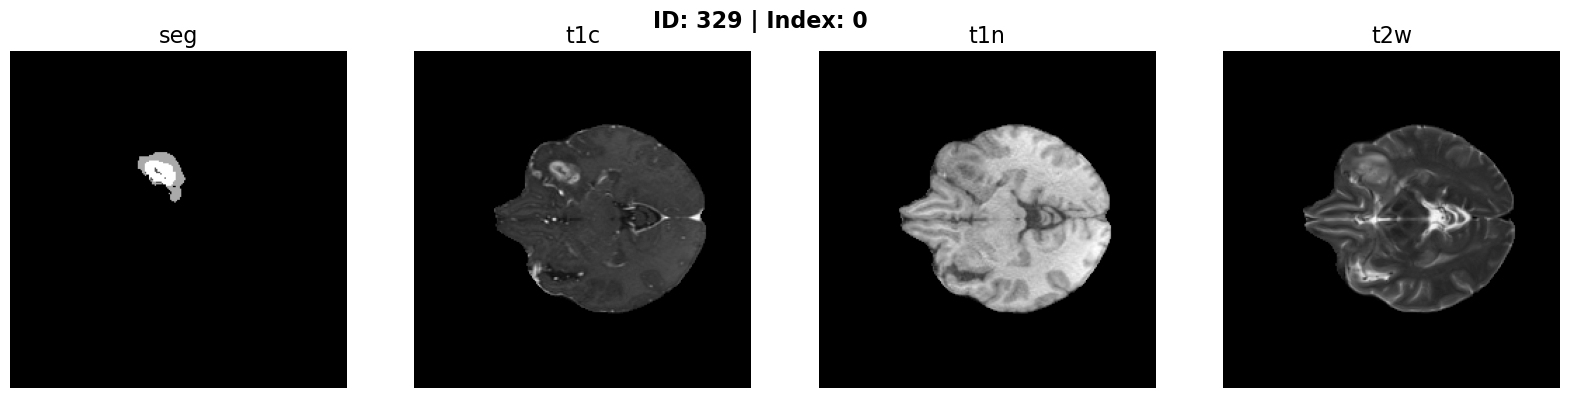

In [61]:
load_the_mris(image_paths_abs,scan_type,60,values_mris)

In [22]:
img_path= r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1c.nii.gz"
img_path_seg= r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-seg.nii.gz"

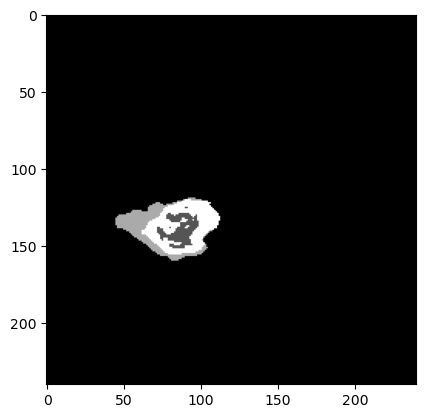

In [29]:
show_nifti(img_path_seg,80)

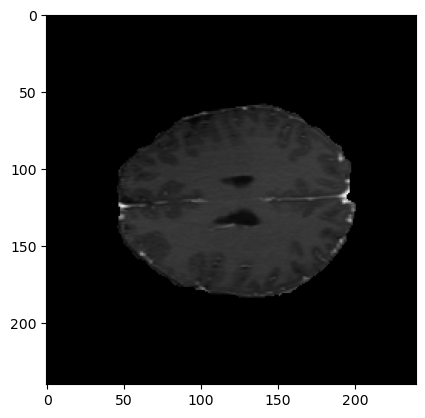

In [23]:
show_nifti(img_path,100)

In [24]:
animate_img(img_path)

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [25]:
animate_labels(img_path_seg)

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

In [ ]:
show_all_layers(img_path)

In [27]:
filename_to_convert=r"C:\Users\bouhe\OneDrive\Bureau\pfe\image.gif"

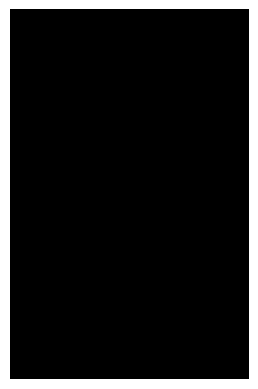

In [28]:
create_gif(nib.load(img_path), title='.gif', filename=filename_to_convert)

In [16]:
image_0_seg = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00087-000\BraTS-GLI-00087-000-seg.nii.gz"
image_1_seg = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00087-001\BraTS-GLI-00087-001-seg.nii.gz"
image_0_t1c = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00087-000\BraTS-GLI-00087-000-t1c.nii.gz"
image_1_t1c = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00087-001\BraTS-GLI-00087-001-t1c.nii.gz"

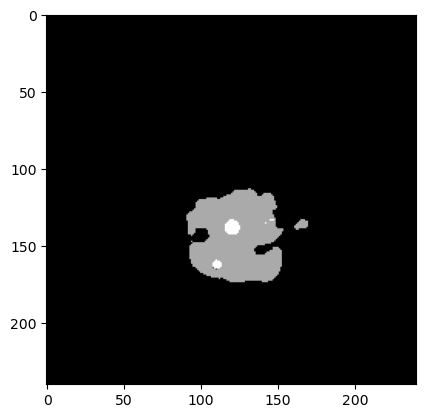

In [57]:
show_nifti(image_0_t1c, 70)

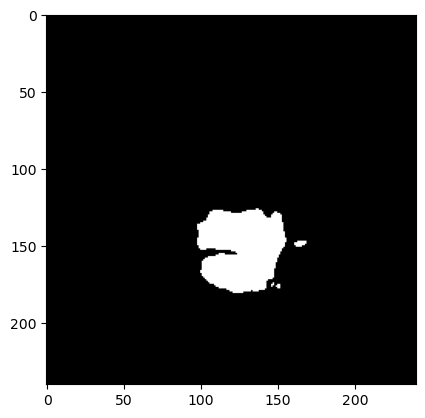

In [58]:
show_nifti(image_1_t1c, 70)

In [17]:
loaded_0_seg =load_nifti(image_0_seg)
loaded_1_seg =load_nifti(image_1_seg)
slice_0 = get_slice(loaded_0_seg,60)
slice_1 = get_slice(loaded_1_seg,60)

In [18]:
unique, counts = np.unique(slice_0, return_counts=True)

In [19]:
dict(zip(unique, counts))

{0.0: 55556, 1.0: 115, 2.0: 1199, 3.0: 730}

In [23]:
loaded_0_t1c =nib.load(image_0_t1c)

In [25]:
print(loaded_0_t1c.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0.  0.]
srow_y          : 

The scan data array has the shape:  (240, 240, 155)
The scan header is as follows: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y      

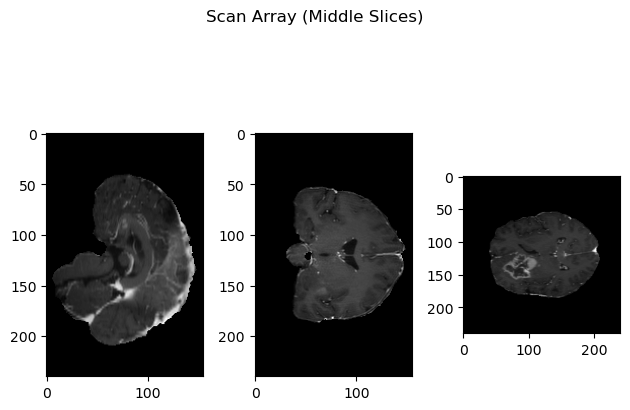

In [40]:
#Define the filepath to your NIfTI scan
scanFilePath = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1c.nii.gz"
 
#Load the scan and extract data using nibabel 
scan = nib.load(scanFilePath)
scanArray = scan.get_fdata()

#Get and print the scan's shape 
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)
 
#Get and print the scan's header
scanHeader = scan.header
print('The scan header is as follows: \n', scanHeader)
 
#Display scan array's middle slices
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()

In [35]:
#Calculate proper aspect ratios
pixDim = scanHeader['pixdim'][1:4]
aspectRatios = [pixDim[1]/pixDim[2],pixDim[0]/pixDim[2],pixDim[0]/pixDim[1]]
print('The required aspect ratios are: ', aspectRatios)

The required aspect ratios are:  [1.0, 1.0, 1.0]


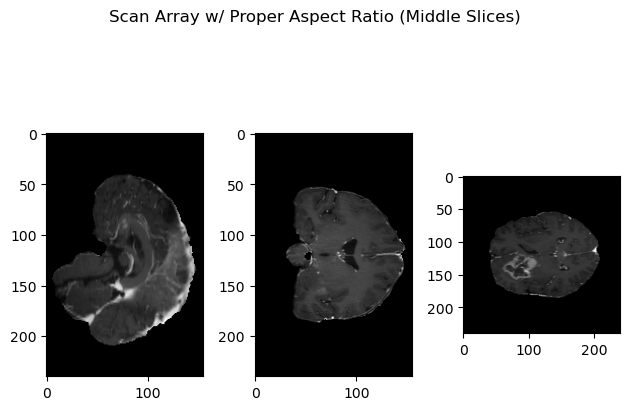

In [40]:
#Display scan array's middle slices with proper aspect ratio
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array w/ Proper Aspect Ratio (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()

### Folder structures

In [64]:
#name_folders_test = dv["path_folder"].tolist()
name_folders_train = dt["path_folder"].tolist()

In [20]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train


In [42]:
%ls

 Le volume dans le lecteur C n'a pas de nom.
 Le num�ro de s�rie du volume est E4A6-EB66

 R�pertoire de c:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test

31/05/2023  23:11    <DIR>          .
31/05/2023  23:11    <DIR>          ..
               0 fichier(s)                0 octets
               2 R�p(s)  65�769�582�592 octets libres


In [43]:
#for name in name_folders_test:
    #!mkdir $name

In [92]:
%cd Test

c:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test


In [ ]:
for name in name_folders_test:
    %cd $name
    #!rm -r 'seg'
    %cd ..

In [25]:
output_parent_dir_path_train = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train"
output_parent_dir_path_test = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test"


In [94]:
_,t1c,t1n,t2f,t2w = images_based_on_scan_type(dv,'test')

In [ ]:
t1n

In [69]:
parent_dir_valid

'C:\\Users\\bouhe\\OneDrive\\Bureau\\pfe\\dataset\\Nifti format BratS\\ASNR-MICCAI-BraTS2023-GLI-Challenge-ValidationData'

In [80]:
savin_dims(t1c,'t1c',output_parent_dir_path_test,parent_dir_valid,name_folders_test)

In [81]:
savin_dims(t1n,'t1n',output_parent_dir_path_test,parent_dir_valid,name_folders_test)

In [82]:
savin_dims(t2f,'ta2f',output_parent_dir_path_test,parent_dir_valid,name_folders_test)

In [83]:
savin_dims(t2w,'t2w',output_parent_dir_path_test,parent_dir_valid,name_folders_test)

In [39]:
name_folders_seg = os.listdir(r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_all_labels')

In [46]:
savin_dims(seg,'seg',r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_all_labels',parent_dir_train,name_folders_seg)

### Adjusting the generated slices

In [19]:
len(name_folders_train)

1251

In [21]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train


In [31]:
%cd BraTS-GLI-00140-000

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train\BraTS-GLI-00140-000


In [26]:
name_folders_train[130]

'BraTS-GLI-00140-000'

In [31]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train


In [ ]:
for name in name_folders_train[129:132]:
    %cd $name
    refs = os.listdir('seg')
    print(refs)
    full_slices = os.listdir('t1c')
    print(full_slices)
    rm_useless_slices('t1c',refs, full_slices)
    print('*********************************************************************************************')

    full_slices = os.listdir('t1n')
    rm_useless_slices('t1n',refs, full_slices)
    print('*********************************************************************************************')

    full_slices = os.listdir('t2f')
    rm_useless_slices('t2f',refs, full_slices)
    print('*********************************************************************************************')

    full_slices = os.listdir('t2w')
    rm_useless_slices('t2w',refs, full_slices)
    print('*********************************************************************************************')
    
    %cd ..



In [ ]:
source_folder = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'
labels_folder = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\labels'
images_folder = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\images'

copy_images(source_folder, labels_folder, images_folder)

print("Images copied to respective folders.")

Images copied to respective folders.


In [ ]:
input_directory = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\images"
output_directory = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS"
organize_images_by_modality(input_directory, output_directory)

### Preprocessing

In [22]:
dir_preprocess = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train"
dir_postprocess = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\preprocessed_images"

In [37]:
%cd $dir_postprocess

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\preprocessed_images


In [26]:
%cd "C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_all_labels"

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_all_labels


In [27]:
import os

In [28]:
folders = os.listdir(r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData")

In [ ]:
for name in folders: 
    print(name)
    !mkdir $name

In [ ]:
for name in folders:
    %cd $name
    !mkdir seg
    #!mkdir t1c
    #!mkdir t1n
    #!mkdir t2f
    #!mkdir t2w
    %cd ..

#### Train_all_labels

In [ ]:
same_size_tests =[]
dir_preprocess_2 = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_all_labels'
dir_postprocess = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_all_labels'
for name in folders:
    seg_dir = join_paths(dir_preprocess_2,name)
    print(seg_dir)
    tmp_seg_dir = join_paths(seg_dir,r'seg')
    seg_images = os.listdir(tmp_seg_dir)
    for name_im in seg_images:
        seg_image = join_paths(tmp_seg_dir,name_im)
        im_array = np.array(Image.open(seg_image))
        replace_pixels(im_array)
        image = Image.fromarray(im_array)
        new_im_path = join_paths(dir_postprocess,'\\'.join(seg_image.split('\\')[-3::]))
        path_whole = seg_image.split('\\')
        new_im_path = ('\\').join(path_whole[0:8]+['train_all_labels']+path_whole[9::])
        image.save(new_im_path)



In [35]:
from PIL import Image as I

In [ ]:
same_size_tests =[]
for name in folders:
    seg_dir = join_paths(dir_preprocess,name)
    tmp_seg_dir = join_paths(seg_dir,r'seg')
    seg_images = os.listdir(tmp_seg_dir)
    for name_im in seg_images:
        seg_image = join_paths(tmp_seg_dir,name_im)
        im_array = np.array(Image.open(seg_image))
        #replace_non_zero_pixels(im_array)
        image = Image.fromarray(im_array)
        #new_im_path = join_paths(dir_postprocess,'\\'.join(seg_image.split('\\')[-3::]))
        path_whole = seg_image.split('\\')
        new_im_path = ('\\').join(path_whole[0:8]+['train_seg_one_mask']+path_whole[9::])
        print(new_im_path)
        image.save(new_im_path)
        break
    break


In [45]:
ex = r'C:\\Users\\bouhe\\OneDrive\\Bureau\\pfe\\dataset\\png_format\\train_seg_one_mask\\BraTS-GLI-01489-000\\seg\\Slice_dim1_89.png'
ex_pre = r'C:\\Users\\bouhe\\OneDrive\\Bureau\\pfe\\dataset\\png_format\\train\\BraTS-GLI-01489-000\\seg\\Slice_dim1_89.png'
im_array = np.array(Image.open(ex_pre))
replace_non_zero_pixels(im_array)        
image.save(ex)

In [44]:
im = I.open(r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_seg_one_mask\BraTS-GLI-01666-000\seg\Slice_dim2_98.png')
ar = np.array(im)
np.unique(ar)

array([0, 1])

In [85]:
from tifffile import imsave

In [ ]:
size_t1cs =[]
for name in folders:
    t1c_dir = join_paths(dir_preprocess,name)
    tmp_t1c_dir = join_paths(t1c_dir,r't1c')
    t1c_images = os.listdir(tmp_t1c_dir)
    for name_im in t1c_images:
        t1c_image = join_paths(tmp_t1c_dir,name_im)
        im_array = np.array(Image.open(t1c_image))
        new_im = normalize_image(im_array)
        image = Image.fromarray(new_im)
        new_im_path = join_paths(dir_postprocess,'\\'.join(t1c_image.split('\\')[-3::]))
        imsave(new_im_path[:-3:]+'tif',image)
        size_t1cs.append(new_im.shape)
    print(name)

### New metadata

In [35]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train


In [ ]:
seg_list = metadata_rows('seg',path_folders,'train')

In [ ]:
t1c_list = metadata_rows('t1c',path_folders,'train')

In [ ]:
t1c_list = metadata_rows('t1c',path_folders,'train')

In [ ]:
t1n_list = metadata_rows('t1n',path_folders,'train')

In [ ]:
t2f_list = metadata_rows('t2f',path_folders,'train')

In [ ]:
t2w_list = metadata_rows('t2w',path_folders,'train')

In [ ]:
seg_list


In [47]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test


In [48]:
path_folders_test = os.listdir()

In [ ]:
t1c_list_test = metadata_rows('t1c',path_folders_test,'test')

In [ ]:
t1n_list_test = metadata_rows('t1n',path_folders_test,'test')

In [ ]:
t2f_list_test = metadata_rows('t2f',path_folders_test,'test')

In [ ]:
t2w_list_test = metadata_rows('t2w',path_folders_test,'test')

In [ ]:
# import pandas as pd
import pandas as pd 
    
# List1 
lst = seg_list+t1c_list+t1n_list+t2f_list+t2w_list+t1c_list_test+t1n_list_test+t2f_list_test+t2w_list_test
    
df = pd.DataFrame(lst, columns =['image_name', 'patient_id', 'time_stamp','scan_type','split'])
df.sort_values(by=["patient_id"], inplace = True)
df

In [95]:
df.to_csv(r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\metadata.csv',index=False)

In [96]:
data = pd.read_csv(r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\metadata.csv')

In [99]:
from IPython.display import display

display(df)

,image_name,patient_id,time_stamp,scan_type,split
0,Slice_dim0_118.png,00000,000,seg,train
257504,Slice_dim1_113.png,00000,000,t1c,train
257503,Slice_dim1_112.png,00000,000,t1c,train
257502,Slice_dim1_111.png,00000,000,t1c,train
257501,Slice_dim1_110.png,00000,000,t1c,train
...,...,...,...,...,...
1385082,Slice_dim2_98.png,01790,000,t1c,test
1385081,Slice_dim2_97.png,01790,000,t1c,test
1385080,Slice_dim2_96.png,01790,000,t1c,test
1482329,Slice_dim0_103.png,01790,000,t1n,test


### Upload the dataset to huggin face

In [1]:
!pip install huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [37]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("Train_folder", data_dir=r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Train", split="train")

In [ ]:
dataset = load_dataset("Minty-Ines/BraTs-2023")

In [ ]:
dataset.push_to_hub(r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\Test")

## Plotting 3D MRI scans: (IN PROGRESS)

To plot them, we need to rasterizd images into a point cloud with reduced dimensionality.  
Passing each scanned pixel into our visualization would net us more than a million points,
so we need to:  
1. resize every image to 128x128  
2. downsample space without tumor for brevity.  

In [27]:
import albumentations as A
class ImageReader:
    def __init__(self, root:str, img_size:int=256, normalize:bool=False, single_class:bool=False):
        pad_size = 256 if img_size > 256 else 224
        self.resize = A.Compose(
            [
                A.PadIfNeeded(min_height=pad_size, min_width=pad_size, value=0),
                A.Resize(img_size, img_size)
            ]
        )
        self.normalize=normalize
        self.single_class=single_class
        self.root=root
        
    def read_file(self, path:str) -> dict:
        scan_type = path.split('-')[-1]
        print("********************************************************")
        print(scan_type)
        print("********************************************************")
        print(path)
        raw_image = nib.load(path).get_fdata()
        raw_mask = nib.load(path.replace(scan_type, 'seg.nii.gz')).get_fdata()
        processed_frames, processed_masks = [], []
        for frame_idx in range(raw_image.shape[2]):
            frame = raw_image[:, :, frame_idx]
            mask = raw_mask[:, :, frame_idx]
            if self.normalize:
                if frame.max() > 0:
                    frame = frame/frame.max()
                frame = frame.astype(np.float32)
            else:
                frame = frame.astype(np.uint8)
            resized = self.resize(image=frame, mask=mask)
            processed_frames.append(resized['image'])
            processed_masks.append(1*(resized['mask'] > 0) if self.single_class else resized['mask'])
        return {
            'scan': np.stack(processed_frames, 0),
            'segmentation': np.stack(processed_masks, 0),
            'orig_shape': raw_image.shape
        }
    
    def load_patient_scan(self, idp:int, idx:int, scan_type:str='flair') -> dict:
        patient_id = str(idp).zfill(5)
        index = str(idx).zfill(3)
        scan_filename = f"{self.root}\\BraTS-GLI-{patient_id}-{index}\\BraTS-GLI-{patient_id}-{index}-{scan_type}.nii.gz"
        print(scan_filename)
        return self.read_file(scan_filename)


In [28]:
def generate_3d_scatter(
    x:np.array, y:np.array, z:np.array, colors:np.array,
    size:int=3, opacity:float=0.2, scale:str='Teal',
    hover:str='skip', name:str='MRI'
) -> go.Scatter3d:
    return go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers', hoverinfo=hover,
        marker = dict(
            size=size, opacity=opacity,
            color=colors, colorscale=scale
        ),
        name=name
    )


In [29]:

class ImageViewer3d():
    def __init__(
        self, reader:ImageReader, mri_downsample:int=10, mri_colorscale:str='Ice'
    ) -> None:
        self.reader = reader
        self.mri_downsample = mri_downsample
        self.mri_colorscale = mri_colorscale

    def load_clean_mri(self, image:np.array, orig_dim:int) -> dict:
        shape_offset = image.shape[1]/orig_dim
        z, x, y = (image > 0).nonzero()
        # only (1/mri_downsample) is sampled for the resulting image
        x, y, z = x[::self.mri_downsample], y[::self.mri_downsample], z[::self.mri_downsample]
        colors = image[z, x, y]
        return dict(x=x/shape_offset, y=y/shape_offset, z=z, colors=colors)
    
    def load_tumor_segmentation(self, image:np.array, orig_dim:int) -> dict:
        tumors = {}
        shape_offset = image.shape[1]/orig_dim
        # 1/1, 1/3 and 1/5 pixels for tumor tissue classes 1(core), 2(invaded) and 3(enhancing)
        sampling = {
            1: 1, 2: 3, 3: 5
        }
        for class_idx in sampling:
            z, x, y = (image == class_idx).nonzero()
            x, y, z = x[::sampling[class_idx]], y[::sampling[class_idx]], z[::sampling[class_idx]]
            tumors[class_idx] = dict(
                x=x/shape_offset, y=y/shape_offset, z=z,
                colors=class_idx/4
            )
        return tumors
    
    def collect_patient_data(self, scan:dict) -> tuple:
        clean_mri = self.load_clean_mri(scan['scan'], scan['orig_shape'][0])
        tumors = self.load_tumor_segmentation(scan['segmentation'], scan['orig_shape'][0])
        markers_created = clean_mri['x'].shape[0] + sum(tumors[class_idx]['x'].shape[0] for class_idx in tumors)
        return [
            generate_3d_scatter(**clean_mri, scale=self.mri_colorscale, opacity=0.3, hover='skip', name='Brain MRI'),
            generate_3d_scatter(**tumors[1], opacity=0.8, hover='all', name='Necrotic tumor core'),
            generate_3d_scatter(**tumors[2], opacity=0.4, hover='all', name='Peritumoral invaded tissue'),
            generate_3d_scatter(**tumors[3], opacity=0.4, hover='all', name='GD-enhancing tumor'),
        ], markers_created
    
    def get_3d_scan(self, patient_idx:int,index:int, scan_type:str='flair') -> go.Figure:
        scan = self.reader.load_patient_scan(patient_idx,index, scan_type)
        data, num_markers = self.collect_patient_data(scan)
        fig = go.Figure(data=data)
        fig.update_layout(
            title=f"[Patient id:{patient_idx}] brain MRI scan ({num_markers} points)",
            legend_title="Pixel class (click to enable/disable)",
            font=dict(
                family="Courier New, monospace",
                size=14,
            ),
            margin=dict(
                l=0,r=0,b=0,t=30
            ),
            legend=dict(itemsizing='constant')
        )
        return fig



In [30]:
folder = r"C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData"

In [31]:
reader = ImageReader(folder, img_size=128, normalize=True, single_class=False)
viewer = ImageViewer3d(reader, mri_downsample=20)

In [32]:
fig = viewer.get_3d_scan(0,0, 't1c')

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1c.nii.gz
********************************************************
t1c.nii.gz
********************************************************
C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\Nifti format BratS\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\BraTS-GLI-00000-000\BraTS-GLI-00000-000-t1c.nii.gz


In [ ]:
pip install git+https://github.com/bsun0802/Zero-Learning-Fast-Medical-Image-Fusion.git

In [11]:
%cd Zero-Learning-Fast-Medical-Image-Fusion-master

c:\Users\bouhe\OneDrive\Documents\Python Scripts\work_internship mitacs_backup\Zero-Learning-Fast-Medical-Image-Fusion-master


In [4]:
%cd code

c:\Users\bouhe\OneDrive\Documents\Python Scripts\work_internship mitacs_backup\Zero-Learning-Fast-Medical-Image-Fusion-master\code


## Fusion T1C AND T2W

In [6]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_fused

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_fused


In [65]:
%cd C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\predicted

C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\predicted


In [66]:
for name in name_folders_train:
    #!mkdir $name
    #!mkdir t1c
    #!mkdir t1n
    #!mkdir t2f
    #!mkdir t2w


In [69]:
len(name_folders_train)

1251

Splitting the data into 70% 30% train test  
876 + 375


In [70]:
name_folders_train[875]

'BraTS-GLI-01173-000'

In [71]:
%cd C:\Users\bouhe\OneDrive\Documents\Python Scripts\work_internship mitacs_backup\Imfusion-main

C:\Users\bouhe\OneDrive\Documents\Python Scripts\work_internship mitacs_backup\Imfusion-main


In [72]:
import fusion_main as f

In [73]:
dir_fusion = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train_fused'
dir_normal = r'C:\Users\bouhe\OneDrive\Bureau\pfe\dataset\png_format\train' #T1C T2W

In [74]:
test_dir = r'C:\Users\bouhe\OneDrive\Documents\Python Scripts\work_internship mitacs_backup\Imfusion-main\demo'

In [76]:
name_folders_train[875]

'BraTS-GLI-01173-000'

In [ ]:
name = name_folders_train[875]
T1 = os.path.join(*[dir_normal,name,'t1c'])
T2 = os.path.join(*[dir_normal,name,'t2w'])
list_t1 = os.listdir(T1)
list_t2 = os.listdir(T2)
flist_t1, flist_t2 = [ os.path.join(T1, path) for path in list_t1 ],  [ os.path.join(T2, path) for path in list_t2 ]
for name1,name2 in zip(flist_t1, flist_t2):
    correct_name = '\\' + name1.split('\\')[-1]
    res = os.path.join(dir_fusion,name) + correct_name
    print(res)
    generatedImage = f.fusion(name1, name2, res)
    print(generatedImage)
    print('***************** IMAGE GENERATED ******************')
    
    

In [11]:
!python3 manual_fusion.py

C:/Users/bouhe/OneDrive/Documents/Python Scripts/work_internship mitacs_backup/Zero-Learning-Fast-Medical-Image-Fusion-master/images/Slice_dim0_143.1.png
C:/Users/bouhe/OneDrive/Documents/Python Scripts/work_internship mitacs_backup/Zero-Learning-Fast-Medical-Image-Fusion-master/images/Slice_dim0_143.2.png
(256, 256, 3)
(256, 256, 3)
demo/out1985.jpg
